In [7]:
import requests

url = "https://storage.openvinotoolkit.org/repositories/datumaro/models/colorization/colorization_release_v2.caffemodel"
response = requests.get(url)
with open("models/colorization_release_v2.caffemodel", "wb") as file:
    file.write(response.content)


In [6]:
%pip install requests

     ---------------------------------------- 64.9/64.9 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 102.4/102.4 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 70.4/70.4 kB 4.0 MB/s eta 0:00:00
     -------------------------------------- 128.4/128.4 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 166.4/166.4 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
%pip install matplotlib

     ---------------------------------------- 8.1/8.1 MB 264.1 kB/s eta 0:00:00
     ------------------------------------ 219.8/219.8 kB 446.8 kB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 458.1 kB/s eta 0:00:00
     -------------------------------------- 72.0/72.0 kB 395.7 kB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 465.0 kB/s eta 0:00:00
     ------------------------------------ 107.7/107.7 kB 779.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os.path

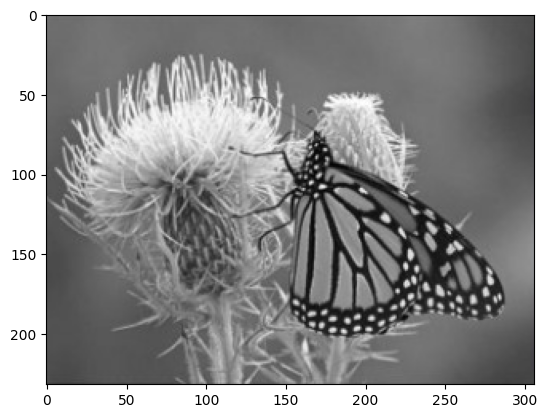

In [ ]:
frame = cv.imread("new.jpg")

numpy_file = np.load('./pts_in_hull.npy')
Caffe_net = cv.dnn.readNetFromCaffe("./models/colorization_deploy_v2.prototxt", "./models/colorization_release_v2.caffemodel")


rgb_img = cv.cvtColor(frame, cv.COLOR_BGR2RGB)		# this converts it into RGB
plt.imshow(rgb_img)
plt.show()


In [20]:
numpy_file = numpy_file.transpose().reshape(2, 313, 1, 1)
Caffe_net.getLayer(Caffe_net.getLayerId('class8_ab')).blobs = [numpy_file.astype(np.float32)]
Caffe_net.getLayer(Caffe_net.getLayerId('conv8_313_rh')).blobs = [np.full([1, 313], 2.606, np.float32)]
     

In [21]:
input_width = 224
input_height = 224

rgb_img = (frame[:,:,[2, 1, 0]] * 1.0 / 255).astype(np.float32)
lab_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2Lab)
l_channel = lab_img[:,:,0] 

l_channel_resize = cv.resize(l_channel, (input_width, input_height)) 
l_channel_resize -= 50

In [22]:
Caffe_net.setInput(cv.dnn.blobFromImage(l_channel_resize))
ab_channel = Caffe_net.forward()[0,:,:,:].transpose((1,2,0)) 

(original_height,original_width) = rgb_img.shape[:2] 
ab_channel_us = cv.resize(ab_channel, (original_width, original_height))
lab_output = np.concatenate((l_channel[:,:,np.newaxis],ab_channel_us),axis=2) 
bgr_output = np.clip(cv.cvtColor(lab_output, cv.COLOR_Lab2BGR), 0, 1)

cv.imwrite("./result2.png", (bgr_output*255).astype(np.uint8))

True

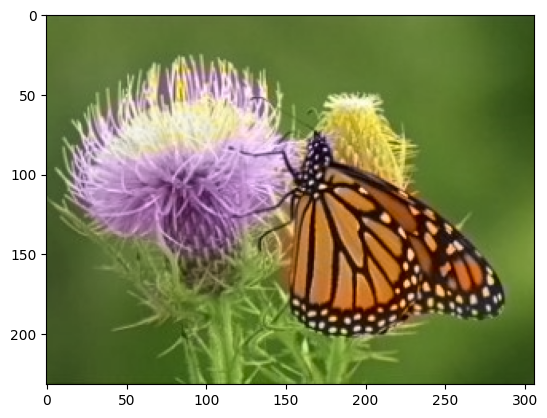

In [23]:
frame1 = cv.imread("result2.png")
rgb_img = cv.cvtColor(frame1, cv.COLOR_BGR2RGB)		# this converts it into RGB
plt.imshow(rgb_img)
plt.show()


In [ ]:
import tkinter as tk
from tkinter import *
from tkinter import filedialog
from PIL import Image, ImageTk
import os
import numpy as np
import cv2 as cv
import os.path
numpy_file = np.load('./pts_in_hull.npy')
Caffe_net = cv.dnn.readNetFromCaffe("./models/colorization_deploy_v2.prototxt", "./models/colorization_release_v2.caffemodel")
numpy_file = numpy_file.transpose().reshape(2, 313, 1, 1)
class Window(Frame):
    def __init__(self, master=None):
        Frame.__init__(self, master)
        self.master = master
        self.pos = []
        self.master.title("B&W Image Colorization")
        self.pack(fill=BOTH, expand=1)
        menu = Menu(self.master)
        self.master.config(menu=menu)
        file = Menu(menu)
        file.add_command(label="Upload Image", command=self.uploadImage)
        file.add_command(label="Color Image", command=self.color)
        menu.add_cascade(label="File", menu=file)
        self.canvas = tk.Canvas(self)
        self.canvas.pack(fill=tk.BOTH, expand=True)
        self.image = None
        self.image2 = None
        label1=Label(self,image=img)
        label1.image=img
        label1.place(x=400,y=370)
    def uploadImage(self):
        filename = filedialog.askopenfilename(initialdir=os.getcwd())
        if not filename:
            return
        load = Image.open(filename)
        load = load.resize((480, 360), Image.LANCZOS)
        if self.image is None:
            w, h = load.size
            width, height = root.winfo_width(), root.winfo_height()
            self.render = ImageTk.PhotoImage(load)
            self.image = self.canvas.create_image((w / 2, h / 2), image=self.render)
           
        else:
            self.canvas.delete(self.image3)
            w, h = load.size
            width, height = root.winfo_screenmmwidth(), root.winfo_screenheight()
           
            self.render2 = ImageTk.PhotoImage(load)
            self.image2 = self.canvas.create_image((w / 2, h / 2), image=self.render2)
        frame = cv.imread(filename)
    
        Caffe_net.getLayer(Caffe_net.getLayerId('class8_ab')).blobs = [numpy_file.astype(np.float32)]
        Caffe_net.getLayer(Caffe_net.getLayerId('conv8_313_rh')).blobs = [np.full([1, 313], 2.606, np.float32)]
        input_width = 224
        input_height = 224
        rgb_img = (frame[:,:,[2, 1, 0]] * 1.0 / 255).astype(np.float32)
        lab_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2Lab)
        l_channel = lab_img[:,:,0] 
        l_channel_resize = cv.resize(l_channel, (input_width, input_height)) 
        l_channel_resize -= 50 
        Caffe_net.setInput(cv.dnn.blobFromImage(l_channel_resize))
        ab_channel = Caffe_net.forward()[0,:,:,:].transpose((1,2,0)) 
        (original_height,original_width) = rgb_img.shape[:2] 
        ab_channel_us = cv.resize(ab_channel, (original_width, original_height))
        lab_output = np.concatenate((l_channel[:,:,np.newaxis],ab_channel_us),axis=2) 
        bgr_output = np.clip(cv.cvtColor(lab_output, cv.COLOR_Lab2BGR), 0, 1)
  
        cv.imwrite("./result.png", (bgr_output*255).astype(np.uint8))
    def color(self):
        load = Image.open("./result.png")
        load = load.resize((480, 360), Image.LANCZOS)
        if self.image is None:
            w, h = load.size
            self.render = ImageTk.PhotoImage(load)
            self.image = self.canvas.create_image((w / 2, h/2), image=self.render)
            root.geometry("%dx%d" % (w, h))
        else:
            w, h = load.size
            width, height = root.winfo_screenmmwidth(), root.winfo_screenheight()
            self.render3 = ImageTk.PhotoImage(load)
            self.image3 = self.canvas.create_image((w / 2, h / 2), image=self.render3)
            self.canvas.move(self.image3, 500, 0)
 
root = tk.Tk()
root.geometry("%dx%d" % (980, 600))
root.title("B&W Image Colorization GUI")
img = ImageTk.PhotoImage(Image.open("new1.jpg"))
app = Window(root)
app.pack(fill=tk.BOTH, expand=1)
root.mainloop()

Overwriting gui.py
